<a href="https://colab.research.google.com/github/hgandras/github-slideshow/blob/master/Sz%C3%BAnyogok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
from pathlib import Path
from PIL import Image
import glob
from natsort import humansorted
import re 
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import shutil as st
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2

In [4]:
kepek=list(Path('drive/My Drive/images/').glob('*'))
szunyoge=pd.read_csv('drive/My Drive/train.csv')
for o in range(len(kepek)):
  kepek[o]=str(kepek[o])

In [5]:
valogatott_kepek=humansorted(kepek)
test_data=sorted(valogatott_kepek[:1794])
train_data=sorted(valogatott_kepek[1794:])

In [6]:
szunyoge.head()

,file,is_tiger
0,images/train_0.png,1
1,images/train_1.png,1
2,images/train_2.png,1
3,images/train_3.png,1
4,images/train_4.png,1


In [7]:
szunyoge.sort_values(by='file',inplace=True)
szunyoge.head()

,file,is_tiger
0,images/train_0.png,1
1,images/train_1.png,1
10,images/train_10.png,1
100,images/train_100.png,1
1000,images/train_1000.png,1


In [8]:
train_label=list(szunyoge['is_tiger'])
len(train_label)

4279

In [9]:
len(train_data)

4279

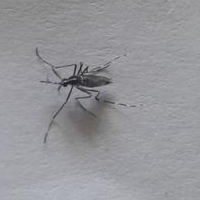

In [10]:
Image.open('drive/My Drive/images/train_100.png')

In [11]:
tigris_szunyog=[]
mas_szunyog=[]
for k in range(len(train_data)):
  if train_label[k]==1:
    tigris_szunyog.append(train_data[k])
  if train_label[k]==0:
    mas_szunyog.append(train_data[k])

In [12]:
#for im in train_data:
#  if im in tigris_szunyog:
#    st.copy2(str(im),'drive/My Drive/train/is_tiger')
#  if im in mas_szunyog:
#   st.copy2(str(im),'drive/My Drive/train/not_tiger')

In [13]:
kepek1=list(Path('drive/My Drive/train/is_tiger').glob('*'))
kepek2=list(Path('drive/My Drive/train/not_tiger').glob('*'))
len(kepek1)

500

In [14]:
len(kepek2)

300

In [15]:
#for h in range(0):
#  st.move(str(kepek2[h]),'drive/My Drive/val/not_tiger')
#for n in range(1000):
# st.move(str(kepek1[n]),'drive/My Drive/val/is_tiger')

In [16]:
kepek3=list(Path('drive/My Drive/val/is_tiger').glob('*'))
len(kepek3)

3083

In [17]:
def imagenet_convert(img):
    img  = img.astype(float)[...,::-1] # RGB --> BGR
    img -= [103.939, 116.779, 123.68]
    return img

In [18]:
train_datagenerator = ImageDataGenerator(preprocessing_function=imagenet_convert)
val_datagenerator  = ImageDataGenerator(preprocessing_function=imagenet_convert)

train_datagenerator = train_datagenerator.flow_from_directory(
        'drive/My Drive/train/',
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')
val_datagenerator= val_datagenerator.flow_from_directory(
        'drive/My Drive/val/',
        target_size=(224,224),
        batch_size=10 ,
        class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 3479 images belonging to 2 classes.


In [19]:
model = ResNet50(weights=None)
pretrained_model = ResNet50(weights='imagenet')

In [20]:
model._layers.pop()
inputs = model.input
output = model.layers[-1].output
output = Dense(1, activation='sigmoid')(output)
model = Model(inputs, output)

In [21]:
pretrained_model._layers.pop()
inputs = pretrained_model.input
output = pretrained_model.layers[-1].output
output = Dense(1, activation='sigmoid')(output)
pretrained_model = Model(inputs, output)

In [22]:
for i in pretrained_model.layers[:-1]:
    i.trainable = False

In [23]:
pretrained_model.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
pretrained_model.fit(train_datagenerator, steps_per_epoch=len(train_datagenerator),
                     validation_data=val_datagenerator, validation_steps = len(val_datagenerator),
                     validation_freq=5, epochs=25)

Epoch 1/25
80/80 [==============================] - 157s 2s/step - loss: 0.7904 - accuracy: 0.5400
Epoch 2/25
80/80 [==============================] - 5s 59ms/step - loss: 0.6617 - accuracy: 0.6275
Epoch 3/25
80/80 [==============================] - 5s 59ms/step - loss: 0.5753 - accuracy: 0.7138
Epoch 4/25
80/80 [==============================] - 5s 59ms/step - loss: 0.5145 - accuracy: 0.7588
Epoch 5/25
80/80 [==============================] - 1740s 22s/step - loss: 0.4689 - accuracy: 0.7987 - val_loss: 0.3760 - val_accuracy: 0.8730
Epoch 6/25
80/80 [==============================] - 5s 58ms/step - loss: 0.4339 - accuracy: 0.8238
Epoch 7/25
80/80 [==============================] - 5s 58ms/step - loss: 0.4060 - accuracy: 0.8388
Epoch 8/25
80/80 [==============================] - 5s 57ms/step - loss: 0.3823 - accuracy: 0.8475
Epoch 9/25
80/80 [==============================] - 5s 58ms/step - loss: 0.3641 - accuracy: 0.8550
Epoch 10/25
80/80 [==============================] - 23s 291ms/st

In [25]:
for i in range(len(test_data)):
  test_data[i]=str(test_data[i])
test_nat=humansorted(test_data)
len(test_nat)
test_nat[-1]

'drive/My Drive/images/test_1793.png'

In [26]:
def datapreprocess(sorszam):
  img1 = image.load_img(test_nat[sorszam], target_size=(224, 224))
  img1 = image.img_to_array(img1)
  x = preprocess_input(np.expand_dims(img1.copy(), axis=0))
  pred=pretrained_model.predict(x)
  return(1-pred)

In [27]:
predictions=[]
for szam in range(len(test_nat)):
  predictions.append(datapreprocess(szam))
len(predictions)

1794

In [28]:
for h in range(len(predictions)):
  predictions[h]=float(predictions[h])

In [29]:
file_names=[]
for l in range(len(test_nat)):
  file_names.append(test_nat[l].replace('drive/My Drive/',''))
len(file_names)
beadandó_d={'file':file_names,'is_tiger':predictions}

In [30]:
beadandó_csv=pd.DataFrame(beadandó_d)

In [31]:
beadandó_csv.head()

,file,is_tiger
0,images/test_0.png,0.247071
1,images/test_1.png,0.237144
2,images/test_2.png,0.261841
3,images/test_3.png,0.179615
4,images/test_4.png,0.217635


In [32]:
datapreprocess(7)

array([[0.25940907]], dtype=float32)

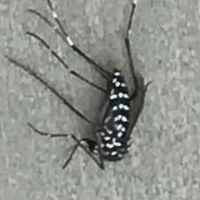

In [33]:
Image.open('drive/My Drive/test/test_7.png')

In [34]:
beadandó_csv.to_csv('szunyog_predictions_3.csv', index=False)

In [35]:
files.download('szunyog_predictions_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
test_nat[1632]

'drive/My Drive/images/test_1632.png'

# Második modell

In [37]:
pretrained_model_2=InceptionResNetV2(weights='imagenet')

225214464/225209952 [==============================] - 3s 0us/step


In [38]:
train_datagenerator = ImageDataGenerator(preprocessing_function=imagenet_convert)
val_datagenerator  = ImageDataGenerator(preprocessing_function=imagenet_convert)

train_datagenerator = train_datagenerator.flow_from_directory(
        'drive/My Drive/train/',
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')
val_datagenerator= val_datagenerator.flow_from_directory(
        'drive/My Drive/val/',
        target_size=(224,224),
        batch_size=10 ,
        class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 3479 images belonging to 2 classes.


In [39]:
pretrained_model_2._layers.pop()
inputs = pretrained_model_2.input
output = pretrained_model_2.layers[-1].output
output = Dense(1, activation='sigmoid')(output)
pretrained_model_2 = Model(inputs, output)

In [40]:
pretrained_model_2.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
pretrained_model_2.fit(train_datagenerator, steps_per_epoch=len(train_datagenerator),
                     validation_data=val_datagenerator, validation_steps = len(val_datagenerator),
                     validation_freq=3, epochs=3)

Epoch 1/3
80/80 [==============================] - 17s 218ms/step - loss: 0.4735 - accuracy: 0.7750
Epoch 2/3
80/80 [==============================] - 17s 217ms/step - loss: 0.2348 - accuracy: 0.9050
Epoch 3/3
80/80 [==============================] - 42s 526ms/step - loss: 0.1087 - accuracy: 0.9563 - val_loss: 0.2238 - val_accuracy: 0.9279


In [42]:
def datapreprocess_2(sorszam):
  img1 = image.load_img(test_nat[sorszam], target_size=(299, 299))
  img1 = image.img_to_array(img1)
  x = preprocess_input(np.expand_dims(img1.copy(), axis=0))
  pred=pretrained_model_2.predict(x)
  return(pred)

In [43]:
datapreprocess_2(28)

array([[0.618906]], dtype=float32)

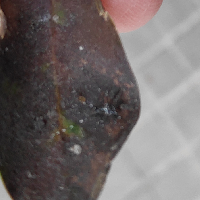

In [44]:
Image.open('drive/My Drive/test/test_28.png')